In [ ]:
# pip install pandas-datareader
import pandas as pd
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import style
from scipy import stats
import numpy as np
import seaborn as sns
%matplotlib inline

start = datetime.datetime(2015,1,1)
end = datetime.datetime(2020,1,1)

df_APPL = web.DataReader(['AAPL'],'yahoo',start=start,end=end)
df_MSFT = web.DataReader(['MSFT'],'yahoo',start=start,end=end)
tickers = ['AAPL', 'MSFT']
Compare_stock = web.get_data_yahoo(tickers,start=start,end=end)
df_MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-01-02 to 2019-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, MSFT)  1258 non-null   float64
 1   (Close, MSFT)      1258 non-null   float64
 2   (High, MSFT)       1258 non-null   float64
 3   (Low, MSFT)        1258 non-null   float64
 4   (Open, MSFT)       1258 non-null   float64
 5   (Volume, MSFT)     1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


In [ ]:
# df_MSFT['Close']=df_MSFT['Close'].astype('str')
columns=['Close','High','Low','Open','Volume']
df_MSFT[columns]=df_MSFT[columns].astype('str')
df_MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-01-02 to 2019-12-31
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, MSFT)  1258 non-null   float64
 1   (Close, MSFT)      1258 non-null   object 
 2   (High, MSFT)       1258 non-null   object 
 3   (Low, MSFT)        1258 non-null   object 
 4   (Open, MSFT)       1258 non-null   object 
 5   (Volume, MSFT)     1258 non-null   object 
 6   (mavg, )           1159 non-null   float64
dtypes: float64(2), object(5)
memory usage: 118.6+ KB


In this notebook, I will analyze 2 technology stocks, which are Apple and Microsoft to see if they are a good buy for short-term or long-term. First of all, I will do some exploratory analysises to see the stock trend for both stocks for the past 5 years(2015 - 2020). We will look at their moving average and expected return(return deviation) to spot their price trend, risk level and trading volume.

First, I am using a moving average calculation to help identify support and resistance prices of stocks to signal where the asset should be traded. In this analysis, we are going to use 100 periods for moving averages.

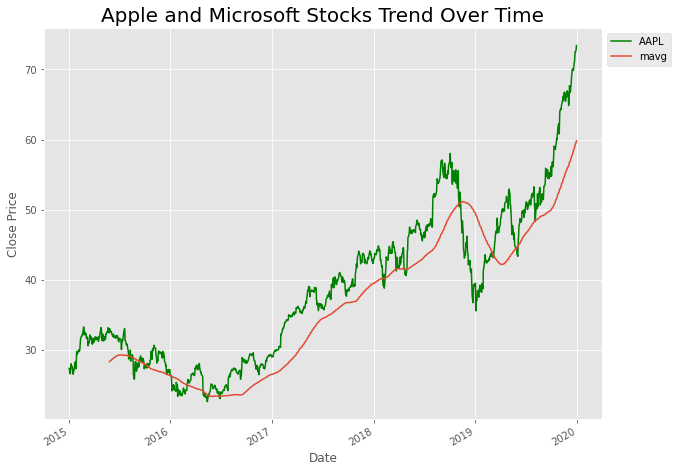

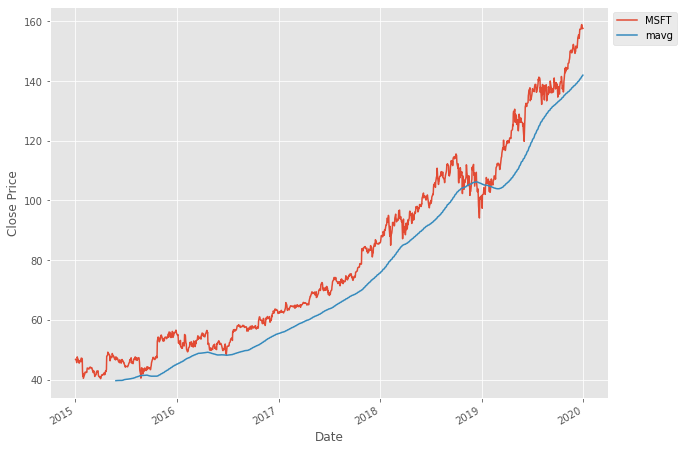

In [ ]:
# Apple
df_APPL_close = df_APPL['Close']
df_APPL['mavg'] = df_APPL['Adj Close'].rolling(window=100).mean()
mavg_APPL = df_APPL['mavg']

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(10, 8))

# APPL close price over time and Moving average trend
plt.style.use('ggplot')
df_APPL_close.plot(label='AAPL', color='g')
mavg_APPL.plot(label='mavg')
plt.ylabel("Close Price")
plt.title("Apple and Microsoft Stocks Trend Over Time", fontsize=20, color='k')
plt.legend(bbox_to_anchor=(1, 1))

# Microsoft
df_MSFT_close = df_MSFT['Close']
df_MSFT['mavg'] = df_MSFT['Adj Close'].rolling(window=100).mean()
mavg_MSFT = df_MSFT['mavg']

# Adjusting the size of matplotlib
df_MSFT_close.plot(label='MSFT')
mavg_MSFT.plot(label='mavg')
plt.ylabel("Close Price")
plt.legend(bbox_to_anchor=(1, 1))
plt.rcParams['axes.facecolor'] = 'w'

Form the above graphs, Both stock trend are uptrend. Apple seems to have more drops during upwards for the past 5 years. However, if we look at the moving average for Apple, we are seeing a lot of crossovers between closed price and moving average. Those indicate buy signals, which generally saying that the trend is shifting up. It also means that the volatility of Apple is comparatively higher. Microsoft moving average closely follows close price, which is beneficial to longer-term trader since less signals(crossovers) to enter/exit market.

Expected Return(Return Deviation) — to determine risk and return.
It measures the mean, or expected value, of the probability distribution of investment returns.

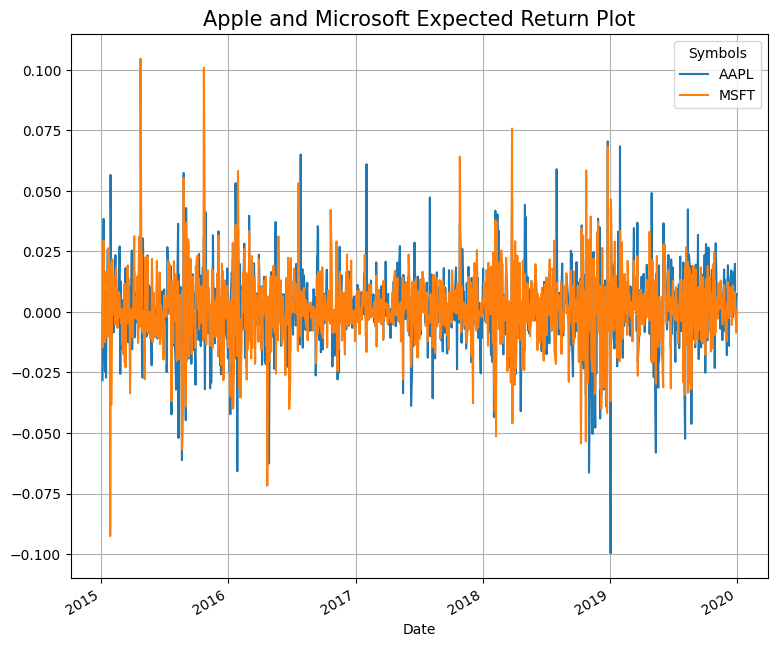

In [ ]:
plt.style.use('default')
Compare_stock_close = Compare_stock['Close']
rets_comp = Compare_stock_close / Compare_stock_close.shift(1) - 1
rets_comp.plot(label='return', figsize=(9,8))

plt.title("Apple and Microsoft Expected Return Plot", fontsize=15, color='k')
plt.grid(True)

From the comparision graph above, it shows that both Apple and Microsoft had 10% drop previously, which means these 2 stocks are risky to invest in terms of certain period of time(short-term). Of course, if you look at the high returns on the graph, Apple have twice 10% increase from 2015 to 2016 while Microsoft's highest return percentage was 7.5%. From above analysis, we can see that Microsoft is increasing more steadily over time compared with Apple.

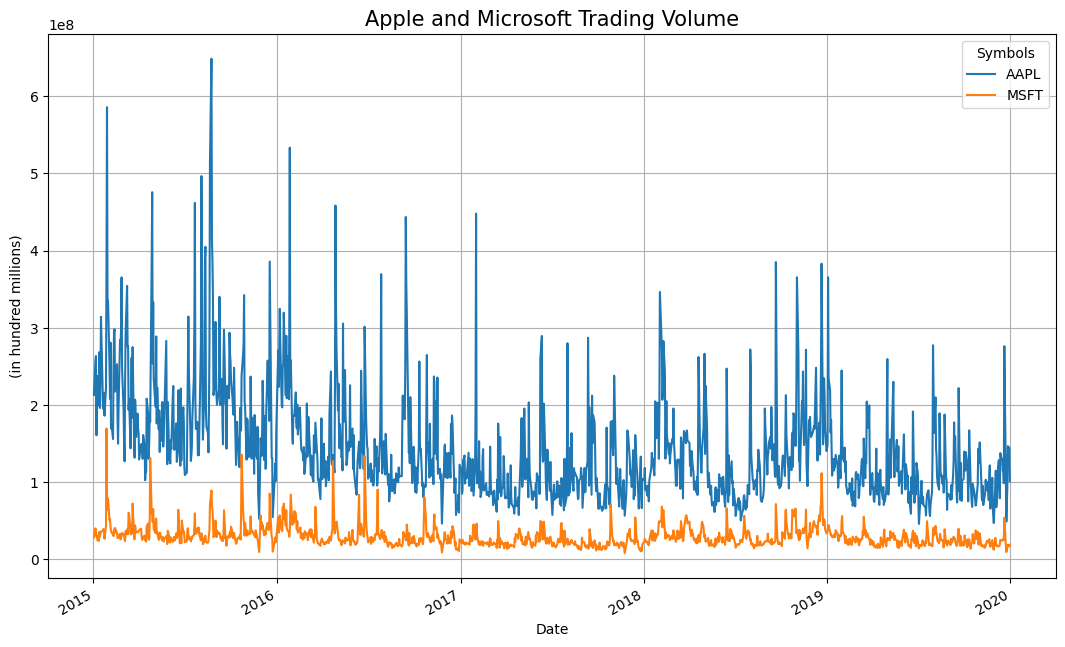

In [ ]:
plt.style.use('default')
Compare_stock_volume = Compare_stock['Volume']
Compare_stock_volume.plot(figsize=(13,8))
plt.ylabel("(in hundred millions)")

plt.title("Apple and Microsoft Trading Volume", fontsize=15, color='k')
plt.grid(True)

Looking at volume patterns over time can help get a sense of the strength or conviction behind advances and declines in specific stocks and entire markets. Volume measures the number of shares traded in a stock or contracts traded in futures or options. From the volume comparision above, Apple has multiple times more trading volumes than Microsoft, that means investors/traders are interested in buying or selling it. 

Null Hypothosis:

> 1.There is no significant difference between Apple and Microsoft stocks adjusted closing prices in 2019.

> 2.There is no significant difference between Apple and Microsoft daily range.


1.There is no significant difference between Apple and Microsoft stocks adjusted closing prices in 2019.

What is Adjusted close price?
It is the closing price after adjustments for all applicable splits and dividend distributions. The closing price is the raw price, which is just the cash value of the last transacted price before the market closes. The adjusted closing price factors in anything that might affect the stock price after the market closes. The main advantage of adjusted closing prices is that they make it easier to evaluate stock performance. Aside from the clear issues with stock splits, failing to account for dividends tends to understate the profitability of value stocks and dividend growth stocks. Since both Apple and Microsoft have multiple times stock split before, it is more accurate to use adjusted close price to evaluate and analyze their stock values.

In [ ]:
df_APPL_2019 = web.DataReader(['AAPL'],'yahoo',start='2019-01-01',end='2019-12-31')
df_MSFT_2019 = web.DataReader(['MSFT'],'yahoo',start='2019-01-01',end='2019-12-31')

APPL_adjclose_2019 = df_APPL_2019['Adj Close'].values
MSFT_adjclose_2019 = df_MSFT_2019['Adj Close'].values

stats.ttest_ind(APPL_adjclose_2019, MSFT_adjclose_2019)

Ttest_indResult(statistic=array([-69.82805355]), pvalue=array([1.15943129e-260]))

In [ ]:
# Calculate the sample size, mean and variance of each sample...
# We will need this information to calculate standard errors

df_APPL_2019_n = APPL_adjclose_2019.shape[0]
df_MSFT_2019_n = MSFT_adjclose_2019.shape[0]
df_APPL_2019_mean = APPL_adjclose_2019.mean()
df_MSFT_2019_mean = MSFT_adjclose_2019.mean()
df_APPL_2019_var = APPL_adjclose_2019.var()
df_MSFT_2019_var = MSFT_adjclose_2019.var()

import math
std_err_difference = math.sqrt((df_APPL_2019_var/df_APPL_2019_n)+(df_MSFT_2019_var/df_MSFT_2019_n))

mean_difference = df_MSFT_2019_mean - df_APPL_2019_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")


The difference in means at the 95% confidence interval is between 74.9567680019463 and 79.27735949686206.


Reject the null hypothesis. With 95% confidence, the difference is between 74.8568 and 79.2774 means. The p-value is extremely small implying that this is a real difference. For sure Apple and Microsoft stocks adjusted closing prices in 2019 affect each other. Let's look at the below scatterplot to see the correlation on the adjusted price between Apple and Microsoft in 2019.




Text(0.5, 1.0, 'Apple and Microsoft Adjusted Close Price Correlation')

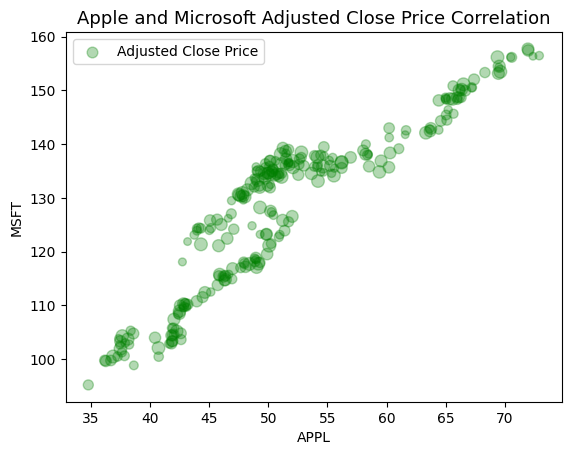

In [ ]:
x = APPL_adjclose_2019
y = MSFT_adjclose_2019
s = np.random.rand(*y.shape) * 60 + 30

plt.scatter(x, y, s, c="g", alpha=0.3, label="Adjusted Close Price")
plt.xlabel("APPL")
plt.ylabel("MSFT")
plt.legend(loc='upper left')
plt.title("Apple and Microsoft Adjusted Close Price Correlation", fontsize=13, color='k')

The graph shows Apple and Microsoft are having a strong positive correlation so we can have a conclusion that when the Apple price increses in 2019, Microsoft price follows. Since we know these 2 stock are having same growth trend direction, but do they have the same degree of volatility? Let's look at the daily range for both stocks below to see the volatility.

Text(0.5, 1.0, 'Apple and Microsoft Adjusted Close Price Comparision')

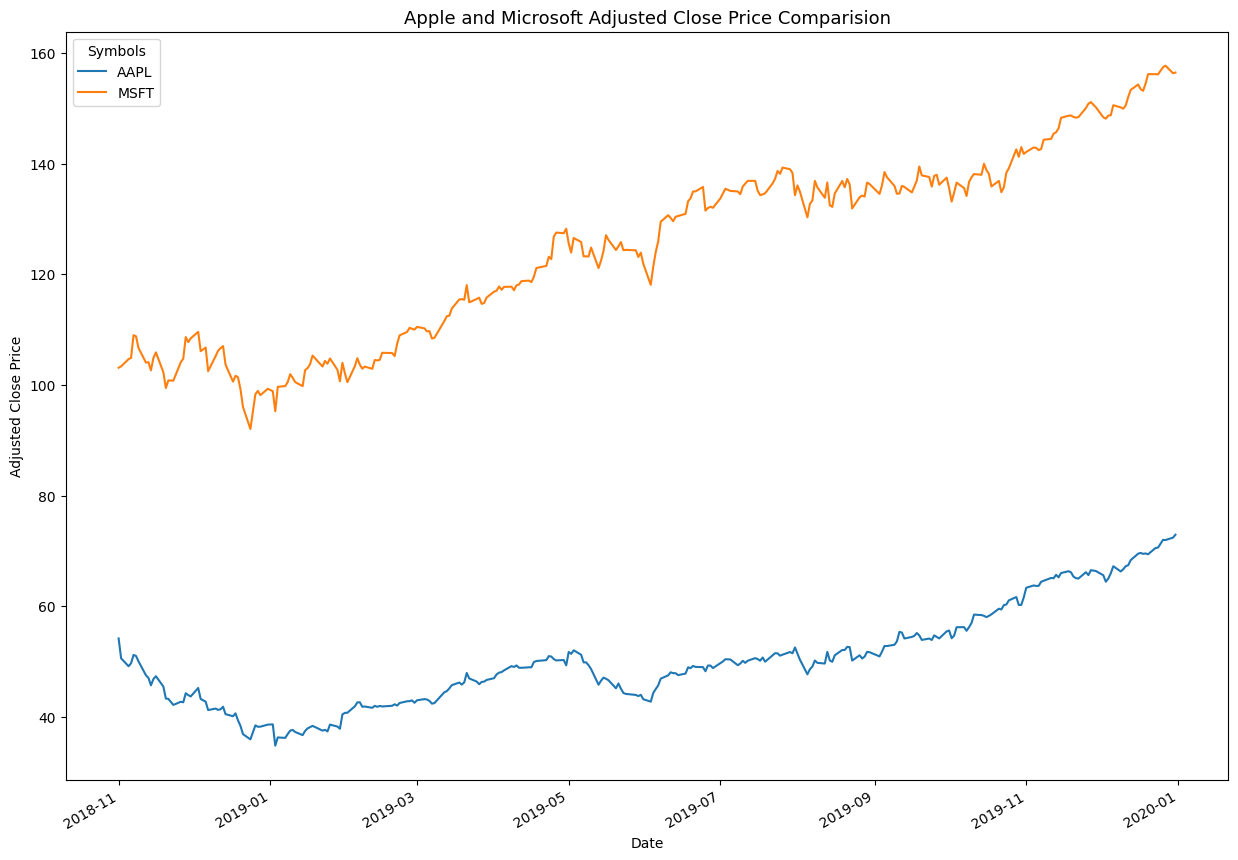

In [ ]:
Compare_stock_2019 = web.get_data_yahoo(tickers,start='2018-11-01',end='2019-12-31')
Compare_stock_2019_Trend = Compare_stock_2019['Adj Close']

Compare_stock_2019_Trend.plot(figsize=(15,11))
plt.ylabel("Adjusted Close Price")
plt.title("Apple and Microsoft Adjusted Close Price Comparision", fontsize=13, color='k')

Let's take a closer look at the end of 2018 to end of 2019 to see if there are any common events that cause Apple and Microsoft stock trend aligned. From the plot "Apple and Microsoft Adjusted Close Price Comparision", we can see 3 periods with news that impact the rises and falls:

1.  At the end of 2018, both stocks dive in was because of trade war with China. Also, technology stocks just capped off their worst month since the depths of the recession a decade ago.
2.  In May 2019, Stocks pulled back sharply last month as investors fretted over U.S. trade relations with China and Mexico and worries over global economic growth.
3.  After May 2019, Microsoft stock climbed because Azure and Office 365 are two big growth engines right now. LinkedIn was doing good, which has nearly 660 million users. Apple investors shook off trade-induced worries and turned bullish on its services and wearable device businesses.


## 2. There is no significant difference on daily range between Apple and Microsoft.

In [ ]:
APPL_Daily_Range = (df_APPL['High']-df_APPL['Low']).values
MSFT_Daily_Range = (df_MSFT['High']-df_MSFT['Low']).values

stats.ttest_ind(APPL_Daily_Range, MSFT_Daily_Range)

Ttest_indResult(statistic=array([-23.11825352]), pvalue=array([2.23917334e-107]))

In [ ]:
APPL_Daily_Range_n = APPL_Daily_Range.shape[0]
MSFT_Daily_Range_n = MSFT_Daily_Range.shape[0]
APPL_Daily_Range_mean = APPL_Daily_Range.mean()
MSFT_Daily_Range_mean = MSFT_Daily_Range.mean()
APPL_Daily_Range_var = APPL_Daily_Range.var()
MSFT_Daily_Range_var = MSFT_Daily_Range.var()

import math
std_err_difference = math.sqrt((APPL_Daily_Range_var/APPL_Daily_Range_n)+(MSFT_Daily_Range_var/MSFT_Daily_Range_n))
mean_difference = MSFT_Daily_Range_mean - APPL_Daily_Range_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 0.6277226308751779 and 0.7439705966774696.


Reject the null hypothesis. With 95% confidence, the difference is between 0.6277 and 0.7440 means. The p-value is extremely small implying that they have a significant difference. So, when Apple daily price range increases, Microsoft follows. 

Text(0.5, 1.0, 'Apple and Microsoft Daily Price Range Correlation')

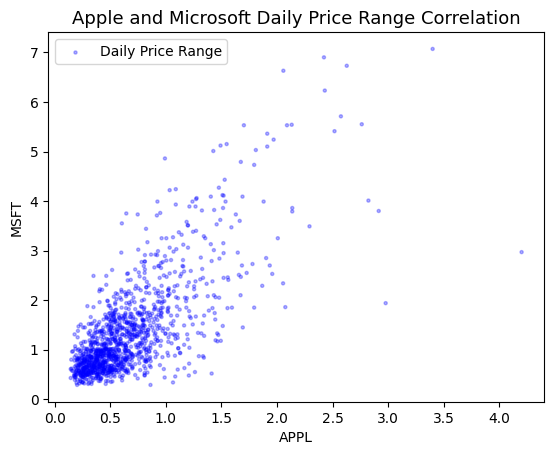

In [ ]:
x = (df_APPL['High']-df_APPL['Low']).values
y = (df_MSFT['High']-df_MSFT['Low']).values
s = np.random.rand(*y.shape) * 0.03 + 5

plt.scatter(x, y, s, c="b", alpha=0.3, label="Daily Price Range")
plt.xlabel("APPL")
plt.ylabel("MSFT")
plt.legend(loc='upper left')
plt.title("Apple and Microsoft Daily Price Range Correlation", fontsize=13, color='k')

Text(0, 0.5, 'Price')

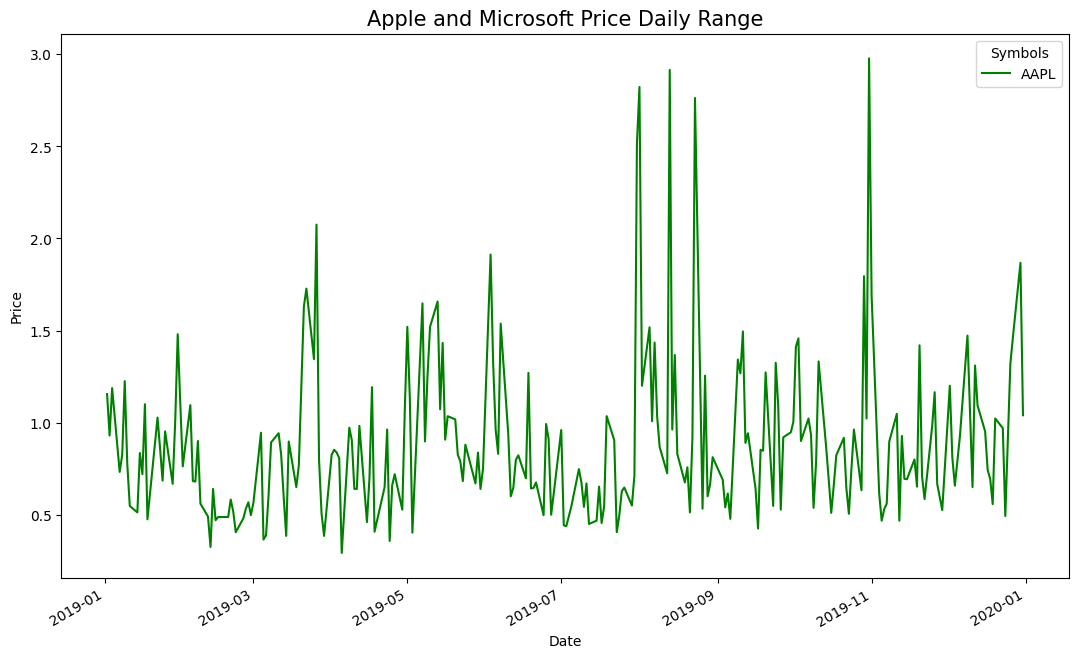

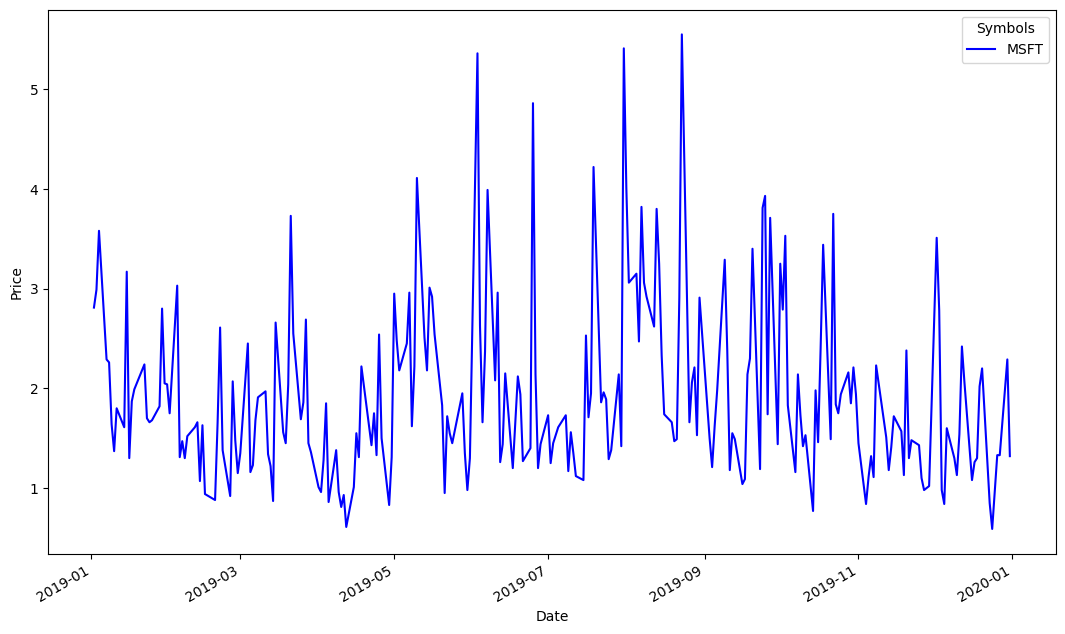

In [ ]:
APPL_Daily_Range_2019 = df_APPL_2019['High']-df_APPL['Low']
MSFT_Daily_Range_2019 = df_MSFT_2019['High']-df_MSFT['Low']

APPL_Daily_Range_2019.plot(color='g',figsize=(13,8))
plt.ylabel("Price")
plt.title("Apple and Microsoft Price Daily Range", fontsize=15, color='k')
MSFT_Daily_Range_2019.plot(color='b',figsize=(13,8))
plt.ylabel("Price")

In 2019, Apple swinged a lot from July to September because new products(iphones) just came out, investors entered or exited the market more frequently due to the good/bad prospect of the company. As of August 2019, Microsoft’s Azure was the second-biggest cloud platform behind Amazon. The company continues to dominate the enterprise market with its Microsoft Office products. So both Apple and Microsoft were outperforamced in another half year of 2019 that lighted up investors' hope, which drove up the stock price.

Text(0.5, 1.0, 'Apple and Microsoft Daily Return Correlation')

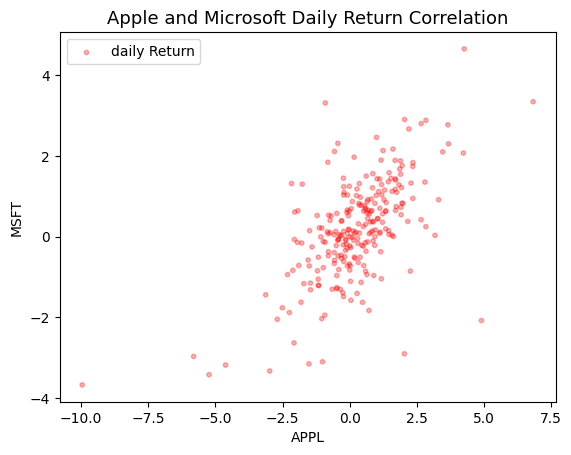

In [ ]:
x = ((df_APPL_2019['Close'] - df_APPL_2019['Close'].shift(1)) / (df_APPL_2019['Close'].shift(1))*100).values
y = ((df_MSFT_2019['Close'] - df_MSFT_2019['Close'].shift(1)) / (df_MSFT_2019['Close'].shift(1))*100).values
s = np.random.rand(*y.shape) * 0.01 + 10

plt.scatter(x, y, s, c="r", alpha=0.3, label="daily Return")
plt.xlabel("APPL")
plt.ylabel("MSFT")
plt.legend(loc='upper left')
plt.title("Apple and Microsoft Daily Return Correlation", fontsize=13, color='k')

Daily stock returns is to monitor the magnitude of stock price change. The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which create larger swings in value. From this daily return correlation graph, we can see that Apple and Microsoft are positive correlated. Let's take a look at how daily return overtime trend for both stocks.

Text(0, 0.5, 'Daily Return')

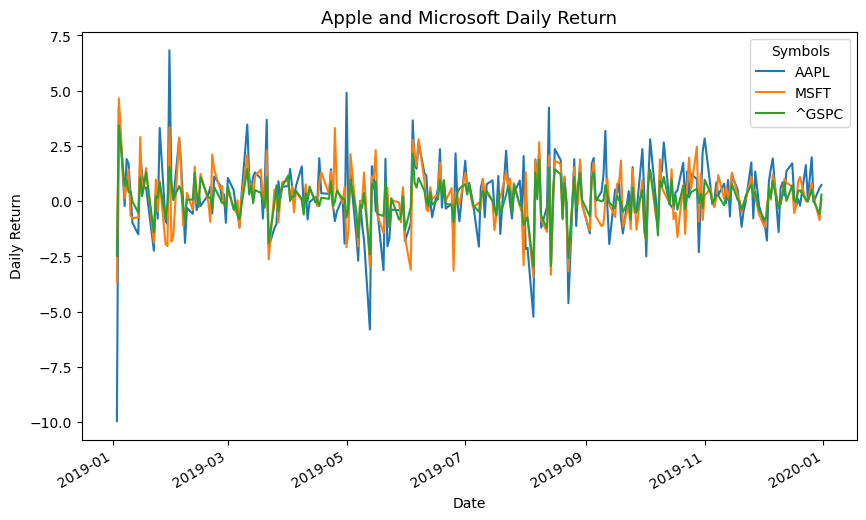

In [ ]:
# S&P 500 index fund is an alternative option if you prefer less risky investment with long-term gain
tickers_2 = ['AAPL', 'MSFT', '^GSPC']
df_daily_return_2019 = web.get_data_yahoo(tickers_2,start='2019-01-01',end='2019-12-31')
daily_return_2019 = ((df_daily_return_2019['Close'] - df_daily_return_2019['Close'].shift(1)) / (df_daily_return_2019['Close'].shift(1))*100)
daily_return_2019.plot(figsize=(10,6))
plt.title("Apple and Microsoft Daily Return", fontsize=13, color='k')
plt.ylabel("Daily Return")

Both Apple and Microsoft has grown in value over time. But Apple has a higher positive or negative daily return(see the blue line), which means the stock is more risky with higher volatility on its value.

If you want to invest either Apple or Microsoft stocks but thinking to mitigate the risks, you can consider investing in the S&P 500(Index funds), which generally tend to be less volatile than most individual stocks. S&P 500 index fund has Apple and Microsoft so it will offer a good return over time. Also, S&P index is more diversified that generates lower risk. Even thought it will fluctuate like stocks, but over time the index has returned about 10 percent annually.

## Recommendation:

1. Long-term investors:
> Both Apple and Microsoft are good to invest for long-term since their trend are upwards over time. Compared with Apple, Microsoft is growing more steadily and smoothly for the past 5 years in terms of the close price. So I would recommend long term investors to either pick Microsoft or both for long term investments because both of them are profitable and come with dividends. Alternatively, investors can considered S&P 500 index fund since both Apple and Microsoft are included with other popular big technology stocks, which has lower risk with long-term gain.
  
2. Speculators:
> This type of investors is looking for a short-term return so Apple is a better pick because Apple is upward trend with drops but still upwards. Speculators can observe Apple stock closely by looking at the moving average to see the right time to enter or exit market. Since Apple has a high volatility and daily trading volumes, this allows investors to trade many times a year as long as the timing is right, short-term gains can be accumulative.

3. Day traders:
> This type of investors relies heavily on stocks with volatility and high daily trading volumes in the market so Apple is a better stock to trade. It has 5 times more daily trading volumes compared with Microsoft. Also, both price daily range and daily return is high, which shows how volatile Apple is.

4. Option traders:
> High daily volume and high volatility are the 2 biggest factors that option traders consider to trade. From the volume graph and daily return graph, we can clearly see that Apple is the winner. I would highly recommend option traders go for Apple. In addition, using put option of Apple as insurance to ensure a long stock position would be another good trading strategy.


